## 某电商平台用户数据分析


### 一、分析背景
- 背景：数据来源于网络，为某电商平台上1.5年的用户消费行为数据截取；
- 目的：通过数据分析输出数据洞察和决策，降本增效；

### 二、分析框架
- 用户消费特征：
    - 整体消费分析
    - 个人消费分析
    - 消费周期分析
    - 生命周期分析
- 用户分层分析
    - RFM分层
    - 月活分层
- 用户质量分析
    - 复购率
    - 回购率
    - 留存率

### 三、分析步骤

- 数据导入
- 数据清洗
- 数据分析
    - 用户消费特征分析
    - 用户分层分析分析
    - 用户质量分析
- 分析总结

### 四、分析过程

### 4.1数据导入

In [104]:
#4.1.1导入常用库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from datetime import datetime
import pymysql
from sqlalchemy import create_engine
%matplotlib inline  
plt.style.use('ggplot')  #使用该风格
plt.rcParams['axes.unicode_minus']=False #正常显示负号
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
#导入数据
import os
os.chdir('/Users/lyn/Documents') #设置相对路径
df=pd.read_table('Data Sample.txt',names=['userid','date','qty','amount'],sep='\s+') #分隔符为空格
#数据中未包含列名，因此需自定义，列名含义为，userid:用户ID，date:订单日期，qty:订单商品数，amount:订单金额
df.head() 

,userid,date,qty,amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [105]:
#4.1.2检查数据信息
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userid  69659 non-null  int64  
 1   date    69659 non-null  int64  
 2   qty     69659 non-null  int64  
 3   amount  69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


- 数据内容：没有空值
- 数据格式：date为int64，需要转换为时间格式 

In [106]:
#4.1.3检查数据信息数据清洗
df['date']=pd.to_datetime(df.date,format="%Y%m%d") #将date转换为时间格式
df['month']=df.date.values.astype('datetime64[M]')    #  生成月份列
df.head()

,userid,date,qty,amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [107]:
 #4.1.4数值列的描述统计
df.describe()

,userid,qty,amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


- 用户数；上半年订单量共69659；用户数共23570；
- 订单商品数：平均值2.41，标准差2.33，中位数为2，75分位数为3，说明大部分订单的商品数不超过3个，较少；
- 订单金额：订单平均消费金额35.89元，75分位数为43，说明大部分订单金额均在50以下，较少；

### 4.2 用户总体消费分析
- 每月的消费总金额
- 每月的消费次数
- 每月的产品购买量
- 每月的消费人数

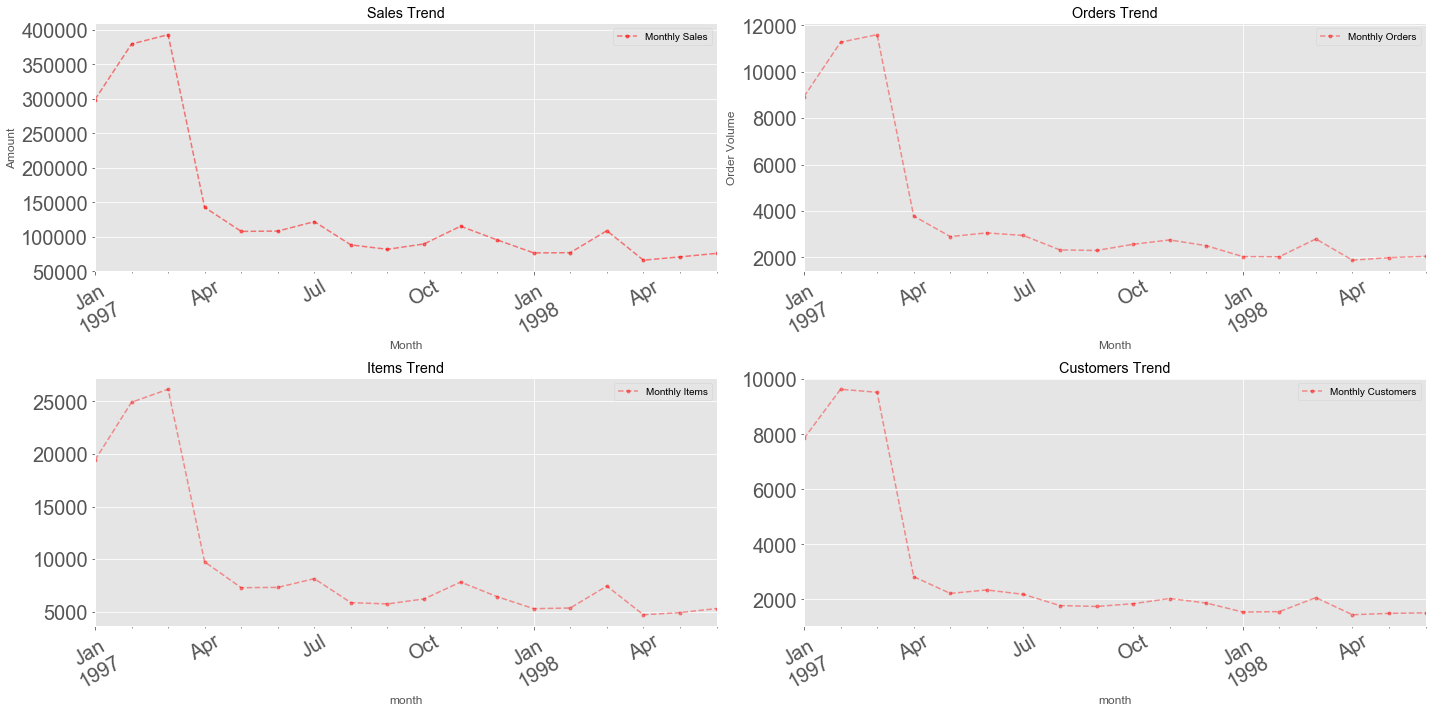

In [308]:
# 设置图的大小，添加子图
plt.figure(figsize=(20,10))  #也可用fig,axes=plt.subplots(2,2,figsize=(20,10))  
gm=df.groupby('month')  #生成month聚合对象
# 每月的总销售额
plt.subplot(221)
gm['amount'].sum().plot(style = '--r.',
                        alpha = 0.5,
                        label='Monthly Sales',
                        grid = True,
                        title='Sales Trend',
                        rot=30,
                        legend = True,
                        fontsize=20)
#plt.title('testing Graph')  # 图名
plt.xlabel('Month')  # x轴标签
plt.ylabel('Amount')  # y轴标签
plt.legend(loc = 'upper right')   # 显示图例，loc表示位置

#每月订单数
plt.subplot(222)
gm['date'].count().plot(style = '--r.', 
                        alpha = 0.4,
                        label='Monthly Orders',
                        grid = True,
                        title='Orders Trend',
                        rot=30,
                        legend = True,
                        fontsize=20)
plt.xlabel('Month')  # x轴标签
plt.ylabel('Order Volume')  # y轴标签
#每月商品销量
plt.subplot(223)
gm['qty'].sum().plot(style = '--r.',  
                       alpha = 0.4,
                       label='Monthly Items',
                       grid = True,
                       title='Items Trend',
                       rot=30,
                       legend = True,
                       fontsize=20)
#每月消费人数
plt.subplot(224)
gm['userid'].apply(lambda x:len(x.unique())).plot(style = '--r.',
                                                  alpha = 0.4,
                                                  label='Monthly Customers',
                                                  title='Customers Trend',
                                                  grid = True,
                                                  rot=30,
                                                  legend = True,
                                                  fontsize=20)
#或者gm.userid.apply(lambda x:len(x.drop_duplicates())).plot() 
plt.tight_layout() # 设置子图的间距

- 四个折线图的整体趋势基本一致，订单量、97Jan-97Mar销售额、单量、商品销量均增长并达到最高峰，消费者量在97Jane-97Feb增长并达到最高峰；97Mar-97Apr四个业绩指标均暴跌50%以上，随后趋于平稳；
- 97Jan-97Feb时期，四大指标均目测有20%以上增长，可能有营销活动获取新用户；97Feb-97Mar时期消费者变化趋势与其他三个指标不一致，可能有促销活动拉升销量；Mar-以后四大指标暴跌，用户大量流失，可能是促销活动结束等原因导致的；

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133d74b10>,
      dtype=object)

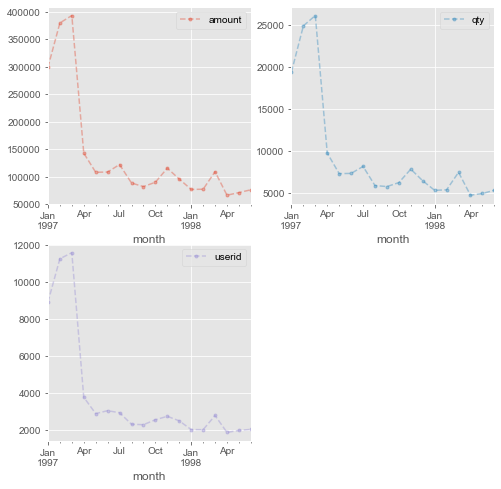

In [109]:
#其他作图方法：数据透视表Subplots画图，最后一张暂时不知道实现方法
pt=df.pivot_table(index='month',   
                  values=['qty','amount','userid'],
                  aggfunc ={'qty':'sum','amount':'sum','userid':'count'})
pt.plot(style = '--.',alpha = 0.4,grid = True,figsize = (8,8),
       subplots = True,
       layout = (2,2),
       sharex = False)

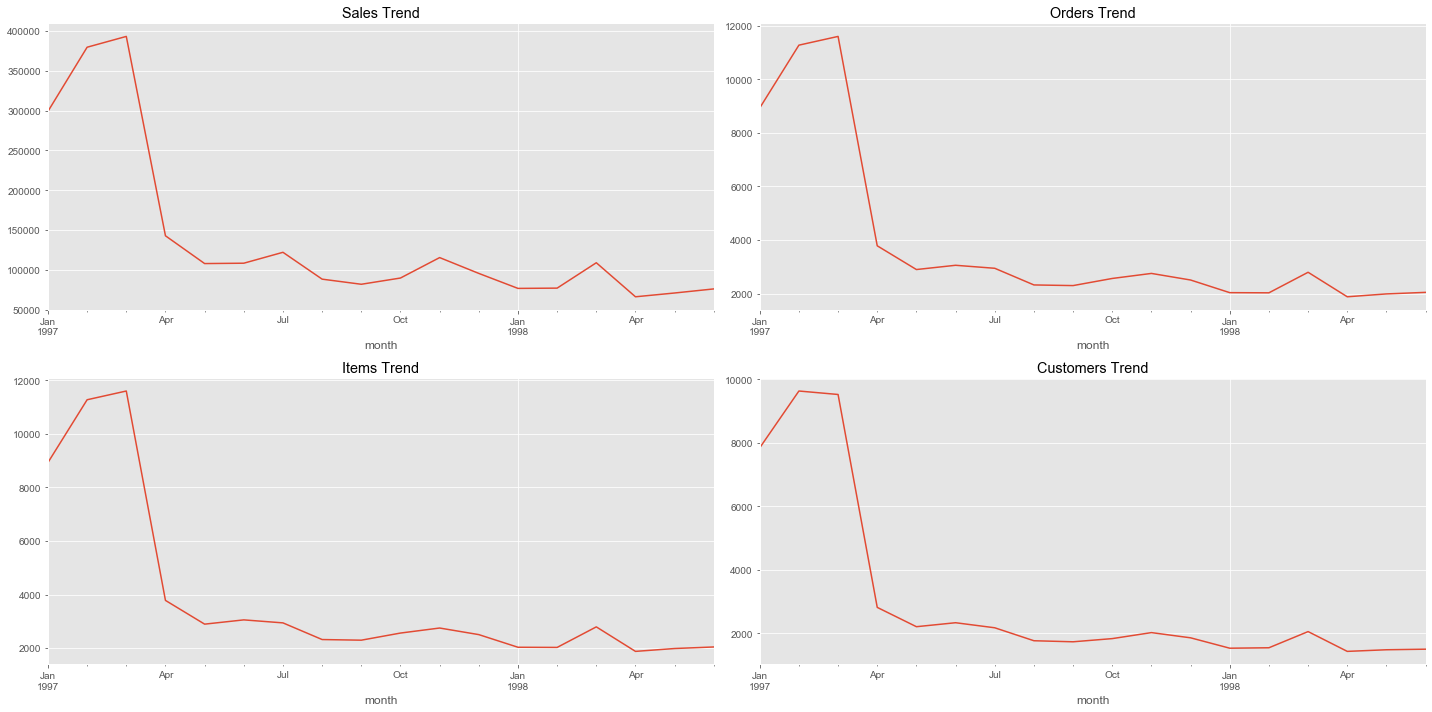

In [307]:
#其他作图方法：同时生成figure和子图，
fig,axes=plt.subplots(2,2,figsize=(20,10)) 
#每月销售额
gm.amount.sum().plot(title='Sales Trend',ax=axes[0][0])
#每月订单数
gm.date.count().plot(title='Orders Trend',ax=axes[0][1])
#每月商品销量
gm.qty.count().plot(title='Items Trend',ax=axes[1][0])
#每月消费人数
gm.userid.apply(lambda x:len(x.drop_duplicates())).plot(title='Customers Trend',ax=axes[1][1]) 
plt.tight_layout() # 设置子图的间距

## 4.3 用户个体消费分析
- 用户消费金额、消费次数、描述统计
- 用户消费金额散点图
- 用户消费金额/次数分布
- 用户累计消费金额占比

In [111]:
#用户消费金额，消费次数的描述统计
gu=df.groupby('userid') 
gu.sum().describe() #按照用户分类求和并取个体消费描述统计

,qty,amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 用户平均购买商品数量是7，但中位数是3，存在小部分的高消用户；
- 用户平均消费金额106，但是中位数是43，存在小部分的高消用户；
- 为排除这部分数据对总体的影响，后续作图会对数据做清洗；取amount<5000，qty<100，

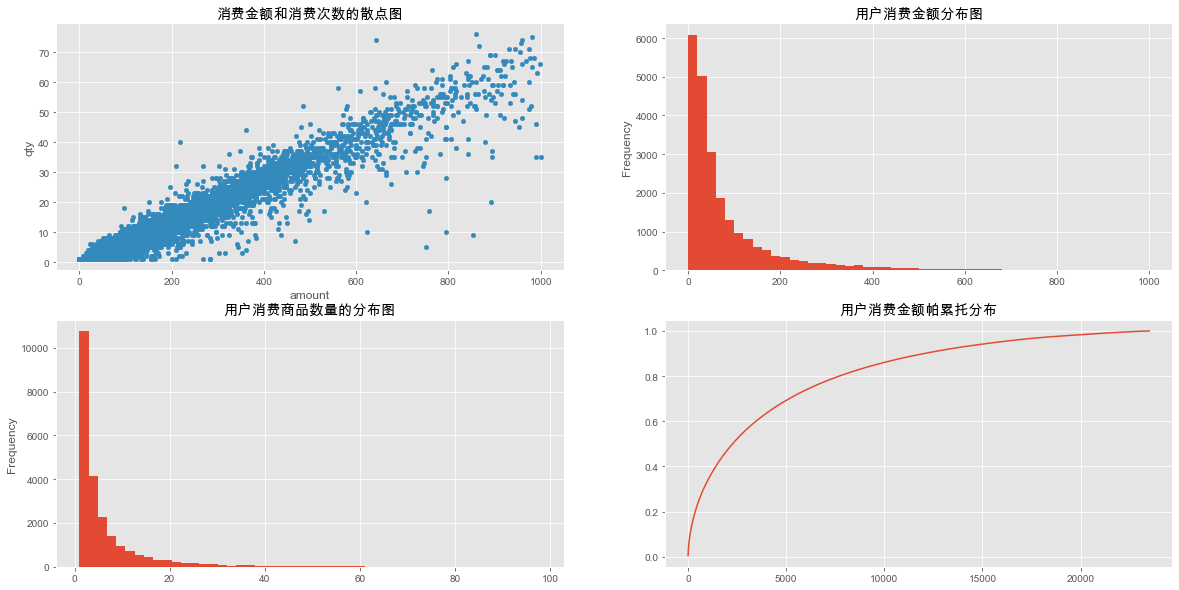

In [306]:
fig,axes=plt.subplots(2,2,figsize=(20,10)) 
#消费金额和消费次数的散点图
gu.sum().query('amount<1000').plot.scatter(x='amount',y='qty',title='消费金额和消费次数的散点图',ax=axes[0][0])  
#用户消费金额分布图
gu.sum().query('amount<1000').amount.plot.hist(bins=50,title='用户消费金额分布图',ax=axes[0][1])
#用户消费商品数量的分布图
gu.sum().query('qty<100').qty.plot.hist(bins=50,title='用户消费商品数量的分布图',ax=axes[1][0])
#用户消费金额帕累托分布图
um=gu.sum().query('amount>0').sort_values('amount',ascending=False)
um.apply(lambda x:x.cumsum()/x.sum()).reset_index().amount.plot(title='用户消费金额帕累托分布',ax=axes[1][1])
#plt.tight_layout() # 设置子图的间距

- 用户消费金额和消费次数散点图：金额和商品量的关系正相关强，说明主要销售商品单一，主要消费客群单一；
- 用户消费金额分布图：大部分用户的消费能力并不高，绝大多数都在200以内，半数用户消费金额不超过60元；
- 用户消费商品数量分布图：绝大部分用户购买商品不超过20，大部分用户购买商品数量在3张以内；
- 用户消费金额帕累托分布图：前8000名用户产生了80%的销售额，总用户数23570，则34%的用户产生了80%的销售额，头部效应显著；

## 4.4 用户行为分析
- 4.4.1用户消费周期和生命周期
    - 用户消费周期描述
    - 用户生命周期描述
    - 用户首次消费和末次消费趋势
    - 用户生命周期分布
- 4.4.2用户分层
    - RFM分层
    - 用户月活分层：新、老、活跃、流失
- 4.4.3用户质量
    - 月复购率:在1个月内消费两次及以上的用户在总消费用户中的占比；
    - 月回购率：上个月消费用户在下一个月仍旧消费的用户在总消费用户中的占比；
    - 留存率：第一次消费后，在一个时间段内再次消费的用户占比；

### 4.4.1用户消费周期和生命周期

In [113]:
#用户消费周期描述统计
timegap = gu.apply(lambda x:x['date'] - x['date'].shift())   
timegap.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: date, dtype: object

- 平均消费周期68天，中位数31天，标准差91天，说明客户消费周期分布不均匀；
- 大部分用户的消费周期都在90天内；

In [222]:
# 用户生命周期描述统计
userlife=gu.date.agg(['min','max']).reset_index()  #求出首次和末次消费时间
userlife['userlife']=(userlife['max']-userlife['min'])/np.timedelta64(1,'D')   #计算消费周期并处以一个timedelta转化为数字
print(userlife.describe(),'\n') 

print((userlife['min'] == userlife['max']).value_counts(),'\n') #最大值和最小值一样，可认为只购买过一次或者活跃过一天
print(userlife.query('userlife>0').userlife.mean()) #去掉0天生命周期的用户后的用户生命周期的平均值为276； 

             userid      userlife
count  23570.000000  23570.000000
mean   11785.500000    134.871956
std     6804.217258    180.574109
min        1.000000      0.000000
25%     5893.250000      0.000000
50%    11785.500000      0.000000
75%    17677.750000    294.000000
max    23570.000000    544.000000 

True     12054
False    11516
dtype: int64 

276.0448072247308


- 平均生命周期134天，中位数0天，标准差180天，说明客户消费周期分布不均匀；
- 12054个客户（超过50%）只有1次消费；后面做消费周期分布时需清洗；
- 去掉0之后的用户平均声明周期276；

In [ ]:
(userlife['min'] == userlife['max']).value_counts()

new_old = (a['min'] == a['max']).value_counts().values

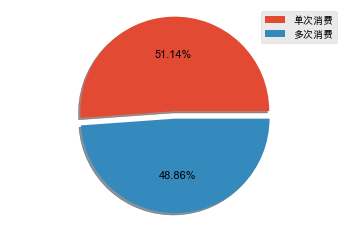

In [387]:
#单次消费和多次消费
plt.pie(x =(userlife['min'] == userlife['max']).value_counts().values,
        autopct = '%.2f%%',
        shadow = True,
        explode = [0.08,0],
        textprops = {'fontsize' : 11})
plt.axis('equal') 
plt.legend(['单次消费','多次消费']) 
#51.14%的客户只消费了一次；

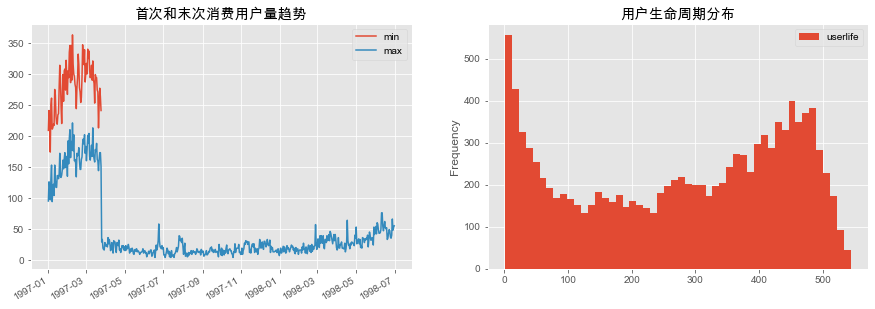

In [395]:
fig,axes=plt.subplots(1,2,figsize=(15,5))   
#用户首次和末次消费
userlife['min'].value_counts().plot(title='首次和末次消费用户量趋势',legend=True,ax=axes[0])
userlife['max'].value_counts().plot(legend=True,ax=axes[0])

#用户生命周期分布
userlife.query('userlife>0').userlife.plot.hist(bins = 50,title='用户生命周期分布',legend=True,ax=axes[1])  

- 用户首次和末次消费趋势：
    - 红色为首次消费，反映拉新，新客户主要出现在在97Jan-97Mar，此后基本上没有新用户产生；
    - 蓝色为末次消费，反映流失，半数以上客户均只购买了一次且集中在97Jan-97Mar，此后末次消费用户量保持稳中缓升，
    - 蓝色和红色之间的差值反映留存，即从97Apr开始用户量持续净流失；
- 用户生命周期分布
    - 用户生命周期分布不健康，生命周期小于50天的用户数量太多，新客留存上需要加强引导；

### 4.4.2 用户分层
- RFM分层
    - 最近消费-R：客户最近一次交易距今时间；R值越小越好，表示交易发生日期越近；
    - 消费频率-F：客户在最近一段时间内交易的次数；F值越大越好，表示客户交易越频繁；
    - 消费金额-M：客户在最近一段时间内交易的金额；M值越大越好，表示客户价值越高；
    - 三个维度分割出8种类型客户：
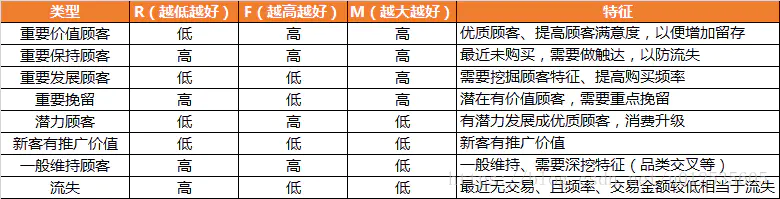
- 用户活跃分层：
    - 新增用户New：第一次消费；
    - 活跃用户Active：在某一段时间内有消费；
    - 沉默用户Silent：在某一段时间内无消费；
    - 回流用户Returned：上一段时间无消费，这段时间内有消费；
    - 定义某一段时间为一个月展开计算；

### RFM分层

In [245]:
#制作RFM数据透视表
rfm=df.pivot_table(index='userid',
                   values=['amount','qty','date'],
                   aggfunc={'amount':'sum','qty':'sum','date':'max'})
rfm.rename(columns={'qty':'F','amount':'M'},inplace=True)
rfm['R'] = (rfm['date'].max() - rfm['date']) / np.timedelta64(1,'D')  #R=日期的最大值-当前日期
rfm.rename(columns={'qty':'F','amount':'M'},inplace=True)   #重命名 rfm 的 column 名
rfm 

,M,date,F,R
userid,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,6,434.0


In [246]:
#制作RFM数据透视表
rfm=df.pivot_table(index='userid',
                   values=['date','amount','qty'],
                   aggfunc={'date':'max','amount':'sum','qty':'sum'})
rfm.rename(columns={'qty':'F','amount':'M'},inplace=True)
rfm['R'] = (rfm['date'].max() - rfm['date']) / np.timedelta64(1,'D')  #R=日期的最大值-当前日期
rfm.rename(columns={'qty':'F','amount':'M'},inplace=True)   #重命名 rfm 的 column 名
#构建RFM用户分层类型函数
def rfmtype(x): 
    level=x.apply(lambda x:'1' if x>=1 else '0')
    label=level.R+level.F+level.M
    d={
       '111':'重要价值客户',
       '011':'重要保持客户',
       '101':'重要挽留客户',
       '001':'重要发展客户',
       '110':'一般价值客户',
       '010':'一般保持客户',
       '100':'一般挽留客户',
       '000':'一般发展客户',}
    result=d[label]
    return result
#计算每个用户的type
rfm['type']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfmtype,axis=1)
rfm1=rfm.reset_index()
rfm1

,userid,M,date,F,R,type
0,1,11.77,1997-01-01,1,545.0,一般挽留客户
1,2,89.00,1997-01-12,6,534.0,一般挽留客户
2,3,156.46,1998-05-28,16,33.0,重要保持客户
3,4,100.50,1997-12-12,7,200.0,一般发展客户
4,5,385.61,1998-01-03,29,178.0,重要保持客户
...,...,...,...,...,...,...
23565,23566,36.00,1997-03-25,2,462.0,一般挽留客户
23566,23567,20.97,1997-03-25,1,462.0,一般挽留客户
23567,23568,121.70,1997-04-22,6,434.0,重要挽留客户
23568,23569,25.74,1997-03-25,2,462.0,一般挽留客户


In [247]:
# 根据type分析RFM数据
rfm2=rfm1.pivot_table(index='type',
                   values=['userid','M','F','R'],
                   aggfunc={'userid':'count','M':'sum','F':'mean','R':'mean'})
rfm2.rename(columns={'userid':'Users'},inplace=True)
rfm2 

,F,M,R,Users
type,,,,
一般价值客户,10.111111,1767.11,472.888889,18
一般保持客户,9.283019,5100.77,146.830189,53
一般发展客户,4.416834,215075.77,178.040080,3493
一般挽留客户,2.115929,445233.28,493.966544,14138
重要价值客户,15.608558,147180.09,454.320127,631
重要保持客户,24.726740,1555586.51,111.671432,4267
重要发展客户,6.984975,80466.30,160.282137,599
重要挽留客户,6.258760,49905.80,469.919137,371


- 从Users数量看，一般挽留客户量规模最大，其次是一般发展、重要保持客户，均与其他客户群有数量级差别，需要重点关注；
- 从M消费金额上看，重要保持客户的累计消费金额最高，且高出1个数量级，是价值最高的客户群；
- 从F消费频率上看，重要价值客户和重要保持客户频率最高；
- 从R最近消费间隔上看，重要保持客户和表现最优；
- 综上，一般发展、重要保持客户、重要价值客户总体表现最优，需要重点维护；另外，针对不同类型客户需采取不同的运营策略，提高LTV；

### 用户活跃分层

In [255]:
#消费数据透视表，计算每个User每个月的消费次数
df1=df.pivot_table(index='userid',
                        columns='month',
                        values='date', 
                        aggfunc='count').fillna(0)
#将消费次数转化为是否有消费，1即有消费，0即无消费；
df2 = df1.applymap(lambda x:1 if x>0 else 0)
df2.head(5)

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
userid,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [272]:
#计算用户不同月份的活跃状态，new=新、active=活跃、returned=回流、silent=沉默）
#本月未消费的情况下，如果以前消费过，则客户为老客，本月为沉默客户；如果以前也未消费过，则客户标记为un
#本月有消费的情况下，如以前未消费，则为新客，否则为老客；为老客时，如果上个月有消费过，则本月为活跃客户，如果上个月未消费，则本月为回流客户；
def status(x): 
    status=[]
    for i in range(18): #共18个月
        
        if x[i]==0:      #如果本月未消费
            if len(status)>0:   #以前有状态记录，则判断上个月的状态
                if status[i-1]=='un':  #如果上个月状态为un，则表示迄今从未消费过，则本月标记为un
                    status.append('un') 
                else:
                    status.append('Silent')    #如果是其他状态那说明以前有消费过，则为沉默用户，标记为Silent
            else:
                status.append('un')   #如果status长度为0，则说明客户从未消费，则本月标记为un；
        else:             #如果本月有消费
            if len(status)==0:       #如果以前从未有状态记录，则为新客，标记为New；
                status.append('New')
            else:                    #如果以前有状态记录，则根据状态来判断本月状态
                if status[i-1] =='Silent':  #如果上个月为沉默客户，则本月为回流客户，标记为returned
                    status.append('Returned')#本月为回流用户
                elif status[i-1]=='un':      #如果上个月状态为'un', 则本月为新客户，标记为New   
                    status.append('New')
                else:
                    status.append('Active')  #如果上个月为其他状态，则本月为活跃用户，标记为Active
    return status
indexs=df['month'].sort_values().astype('str').unique()     #创建月份indexs
df3=df2.apply(lambda x:pd.Series(status(x),index=indexs),axis=1)  #按行计算，得到每个User的状态Series
df3

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
userid,,,,,,,,,,,,,,,,,,
1,New,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent
2,New,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent
3,New,Silent,Returned,Active,Silent,Silent,Silent,Silent,Silent,Silent,Returned,Silent,Silent,Silent,Silent,Silent,Returned,Silent
4,New,Silent,Silent,Silent,Silent,Silent,Silent,Returned,Silent,Silent,Silent,Returned,Silent,Silent,Silent,Silent,Silent,Silent
5,New,Active,Silent,Returned,Active,Active,Active,Silent,Returned,Silent,Silent,Returned,Active,Silent,Silent,Silent,Silent,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,un,un,New,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent
23567,un,un,New,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent
23568,un,un,New,Active,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent,Silent


In [274]:
#计算每月各个状态的用户量数据
#先用.replace将un替换成np.NaN,则un不会统计；再用value_counts计算用户量，然后用.fillna(0)把空值填为0，最后.T转置即可
df4=df3.replace('un',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T.reset_index()
#也可用df4=df3.apply(lambda x:pd.value_counts(x)).T.drop('un',axis=1).fillna(0).reset_index()
df4

,index,Active,New,Returned,Silent
0,1997-01-01,0.0,7846.0,0.0,0.0
1,1997-02-01,1157.0,8476.0,0.0,6689.0
2,1997-03-01,1681.0,7248.0,595.0,14046.0
3,1997-04-01,1773.0,0.0,1049.0,20748.0
4,1997-05-01,852.0,0.0,1362.0,21356.0
5,1997-06-01,747.0,0.0,1592.0,21231.0
6,1997-07-01,746.0,0.0,1434.0,21390.0
7,1997-08-01,604.0,0.0,1168.0,21798.0
8,1997-09-01,528.0,0.0,1211.0,21831.0
9,1997-10-01,532.0,0.0,1307.0,21731.0


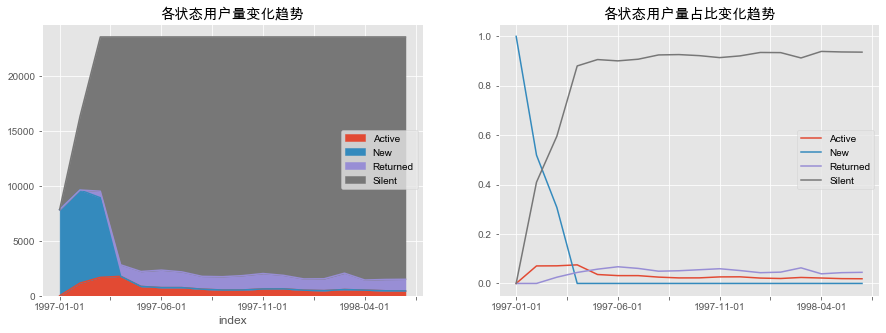

In [382]:
fig2,axes=plt.subplots(1,2,figsize=(10,5))
#各状态用户量变化趋势： 
df4.plot.area(x='index',figsize=(15,5),ax=axes[0],title='各状态用户量变化趋势')
#各状态用户量占比变化趋势
df5=df3.replace('un',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T.apply(lambda x:x/x.sum(),axis=1) 
df5.plot(title='各状态用户量占比变化趋势',ax=axes[1]) 

- 新增用户：前三个月后再无新增，大部分转化为了沉默用户，留存效果不好；
- 活跃用户：前三个月比例和量都持续上升，三月后开始下降后趋于稳定，促活效果不好；
- 回流用户：比例较为稳定；
- 沉默用户：97Jan-Mar数量和比例均暴涨，之后趋于稳定，表明97Jan-Mar的新增用户绝大部分都流失了；

### 4.4.3用户质量分析
- 月复购率:在1个月内消费两次及以上的用户在总消费用户中的占比；
- 月回购率：上个月消费用户在下一个月仍旧消费的用户在总消费用户中的占比；
- 留存率:用户在第一次消费后，有多少比率进行第二次消费;

In [448]:
#计算复购率，消费2次以上记为1，消费1次记为0，消费0次记为NAN，则在sum和count的时候Nan不不会被计算
df6=df1.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
df6

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
userid,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [446]:
df6.sum() / df6.count()

month
1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

In [450]:
df2

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
userid,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [453]:
#计算回购率
#本月未消费情况下，记为nan
#本月有消费情况下，如果上月有消费，则本月记为1，如果上月无消费，记为0
def buystatus(x):   
    status=[]
    for i in range(18): #循环18个月
        if x[i]==0:        #若本月无消费，则本月记为Nan 
            status.append(np.nan)
        else:                     #若本月有消费
            if len(status)==0:    #如果这是第一次消费，则记为0
                status.append(0)
            else:
                if x[i-1]==1:      #如果上个月有消费，则记为1
                    status.append(1) 
                else:                    #如果上个月没有消费，则记为0
                    status.append(0)
    return pd.Series(status,index=indexs)
df7=df2.apply(buystatus,axis=1)  #按行计算，得到每个User的状态Series
df7

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
userid,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,1.0,NaN,0.0,1.0,1.0,1.0,NaN,0.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [456]:
df7.sum()/df7.count()

1997-01-01    0.000000
1997-02-01    0.120108
1997-03-01    0.176501
1997-04-01    0.628278
1997-05-01    0.384824
1997-06-01    0.319367
1997-07-01    0.342202
1997-08-01    0.340858
1997-09-01    0.303623
1997-10-01    0.289288
1997-11-01    0.307692
1997-12-01    0.339056
1998-01-01    0.333116
1998-02-01    0.304320
1998-03-01    0.277184
1998-04-01    0.360473
1998-05-01    0.308468
1998-06-01    0.296149
dtype: float64

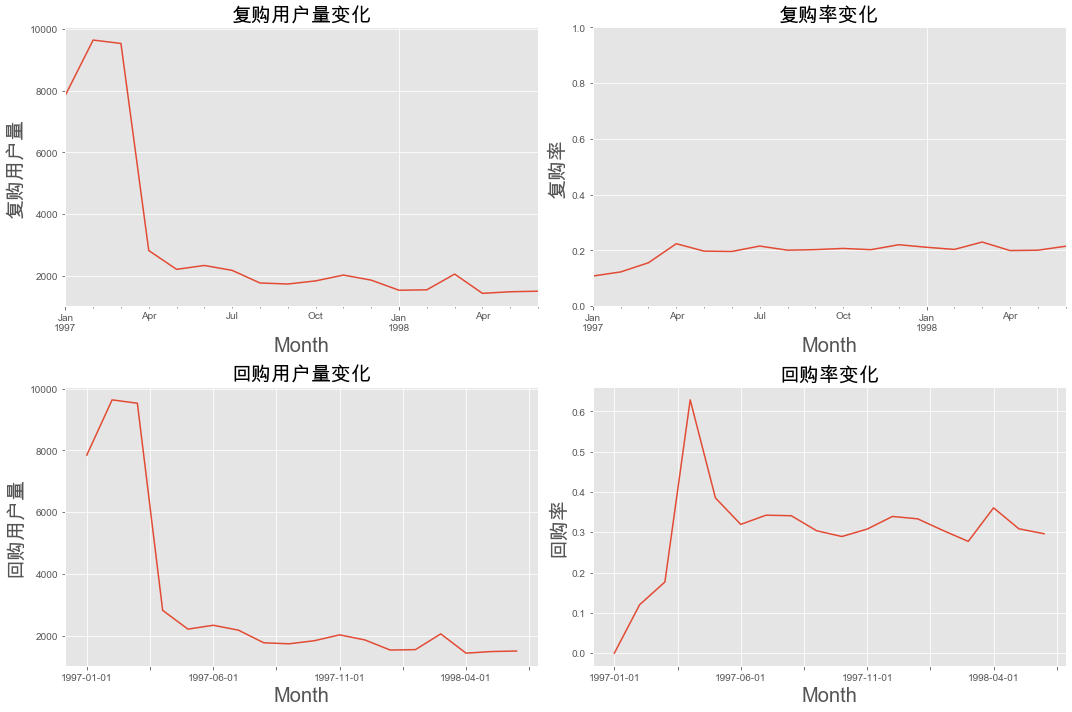

In [466]:
#作图
fig1=plt.figure(figsize=(20,10))
#复购用户量变化
plt.subplot(221)
df6.count().plot(figsize=(15,10))
plt.xlabel('Month', fontsize=20)
plt.ylabel('复购用户量',fontsize=20)
plt.title('复购用户量变化',fontsize=20) 
#复购率变化
plt.subplot(222)
(df6.sum() / df6.count()).plot(figsize=(15,10))
plt.xlabel('Month', fontsize=20)
plt.ylabel('复购率',fontsize=20)
plt.ylim(0,1)
plt.title('复购率变化',fontsize=20) 
#回购用户量变化
plt.subplot(223)
df7.count().plot(figsize=(15,10))
plt.xlabel('Month', fontsize=20)
plt.ylabel('回购用户量', fontsize=20)
plt.title('回购用户量变化', fontsize=20);
#回购率变化
plt.subplot(224)
(df7.sum()/df7.count()).plot(figsize=(15,10))
plt.xlabel('Month', fontsize=20)
plt.ylabel('回购率', fontsize=20)
plt.title('回购率变化', fontsize=20);
plt.tight_layout() # 设置子图的间距

- 复购用户量和回购用户量：均在97Jan-Feb上升然后下降的趋势，Apr后稳定缓慢下降；
- 复购率：97Jan大量新用户进入，51%的客户均消费一次，故前面两个月复购率较低，后期复购率稳定在在20%左右；
- 回购率：97Jan进入的新用户大多只是单次消费，故前面2个月回购率较低，4月份起回购率稳定在30%左右。
- 新用户的最初2个月是重要的窗口期，一旦流失便很难激活，故需加强对新用户的初期消费引导；

In [477]:
#留存率
#留存率：它指用户在第一次消费后，有多少比率进行第二次消费。
#先得到用户每次消费距离当次消费的日期差，再对日期差分筒
firstbuy=gu.date.min().reset_index() #得到每个用户的首购日期
firstbuy.columns=['userid','datemin']  #更改column名字为datemin
df8=pd.merge(df,firstbuy,how='inner',on='userid')   #与原表merge
df8['dategap']=(df8.date-df8.datemin)/np.timedelta64(1,'D')  #新增一列为购买日期与首购日期的差值
df8

,userid,date,qty,amount,month,datemin,dategap
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0.0
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-12,0.0
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12,0.0
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,0.0
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-02,87.0
...,...,...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01,1997-03-25,11.0
69655,23568,1997-04-22,1,14.99,1997-04-01,1997-03-25,28.0
69656,23569,1997-03-25,2,25.74,1997-03-01,1997-03-25,0.0
69657,23570,1997-03-25,3,51.12,1997-03-01,1997-03-25,0.0


In [489]:
#将时间间隔分桶
bin=[0,7,15,30,90,180,360]
df8['dategapbin']=pd.cut(df8.dategap,bins=bin)
df8.head(10)

,userid,date,qty,amount,month,datemin,dategap,dategapbin
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0.0,NaN
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-12,0.0,NaN
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12,0.0,NaN
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,0.0,NaN
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-02,87.0,"(30.0, 90.0]"
5,3,1997-04-02,2,19.54,1997-04-01,1997-01-02,90.0,"(30.0, 90.0]"
6,3,1997-11-15,5,57.45,1997-11-01,1997-01-02,317.0,"(180.0, 360.0]"
7,3,1997-11-25,4,20.96,1997-11-01,1997-01-02,327.0,"(180.0, 360.0]"
8,3,1998-05-28,1,16.99,1998-05-01,1997-01-02,511.0,NaN
9,4,1997-01-01,2,29.33,1997-01-01,1997-01-01,0.0,NaN


In [490]:
#用户第一次消费之后，后续各时间段的消费总额
dfretention=df8.pivot_table(index='userid',
columns='dategapbin',values='amount',aggfunc=sum,dropna=False)
dfretention.head()

dategapbin,"(0, 7]","(7, 15]","(15, 30]","(30, 90]","(90, 180]","(180, 360]"
userid,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,29.73,NaN,NaN,41.44
5,NaN,13.97,NaN,38.9,110.4,155.54


In [492]:
#1代表有消费，0代表没有
dfr=dfretention.applymap(lambda x:1 if x>0 else 0)
dfr

dategapbin,"(0, 7]","(7, 15]","(15, 30]","(30, 90]","(90, 180]","(180, 360]"
userid,,,,,,
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,1
4,0,0,1,0,0,1
5,0,1,0,1,1,1
...,...,...,...,...,...,...
23566,0,0,0,0,0,0
23567,0,0,0,0,0,0
23568,0,1,1,0,0,0


Text(0.5, 1.0, '留存率')

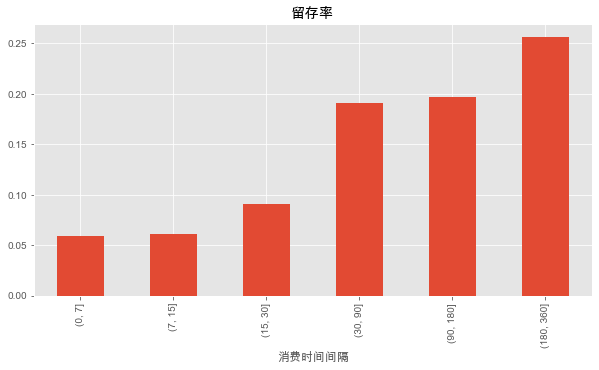

In [493]:
#每笔订单离第一笔订单的时间间隔
(dfr.sum()/dfr.count()).plot.bar(figsize=(10,5))
plt.xlabel('消费时间间隔')
plt.title('留存率')

- 7天留存6%用户，7-15天内留存6%，15-30天留存8%，30-90天留存19%，90-180天留存20%，180-360天留存26%，整体留存率很低；

## 五、分析总结
### 数据表现
- 总体消费趋势：97Jan-97Mar客户量、销售额、单量、商品销量等业务指标均升高，可能进行了大型营销活动获客，随后各指标暴跌，最后趋于平稳；
- 个体消费特征：客单价低，销售商品单一，主要消费客群单一，可以拓展关联产品线提高客单价和购物频次；
- 用户消费周期和生命周期：新客户主要来自前3个月，其后基本上没有获客；51%客户均只消费一次；缺乏新用户来源和留存手段；
- RFM分析：一般发展、重要保持客户、重要价值客户总体表现最优，需要重点维护；另外，针对不同类型客户需采取不同的运营策略，提高LTV；
- 月活分析：97Jan-Mar的新增用户绝大部分流失，缺乏促活和留存手段；
- 复购、回购和留存：整体留存率很低；故前面两个月复购和回购率较低，后期复购率稳定在在20%左右，回购率稳定在30%左右。

### 主要问题：
- 缺乏新用户来源：4月后无新用户产生，需要用户referal相关活动开展和功能开发，利用好老客户私域流量，降低获客成本；
- 缺乏促活手段：该用户群体最初的1个月是重要的窗口期，一旦流失便很难激活，故需加强对新用户的初期消费引导，延长其生命周期；
- 缺乏留存手段：二次消费用户在50-60天的时候需要进行召回活动，延长其生命周期；重点维护一般发展、重要保持客户、重要价值客户三个客户群体，建立用户成长体系，提高LTV；
- 客客单价和消费频次低：可以拓展关联产品线，优化购物动线，搭配各种销售捆绑、推荐活动，提高客单价和购物频次；